# 机器学习工程师纳米学位
## 强化学习
## 项目 4: 训练智能出租车学会驾驶

欢迎来到机器学习工程师纳米学位的第四个项目！在这个notebook文件中，模板代码已经提供给你，有助于你对*智能出租车*的分析和实现学习算法。你无须改动已包含的代码，除非另有要求。 你需要回答notebook文件中给出的与项目或可视化相关的问题。每一个你要回答的问题前都会冠以**'问题 X'**。仔细阅读每个问题，并在后面**'回答'**文本框内给出完整的回答。你提交的项目会根据你对于每个问题的回答以及提交的`agent.py`的实现来进行评分。 

>**提示：** Code 和 Markdown 单元格可通过 **Shift + Enter** 快捷键来执行。此外，Markdown可以通过双击进入编辑模式。

-----

## 开始
在这个项目中，你将构建一个优化的Q-Learning驾驶代理程序，它会操纵*智能出租车* 通过它的周边环境到达目的地。因为人们期望*智能出租车*要将乘客从一个地方载到另一个地方，驾驶代理程序会以两个非常重要的指标来评价：**安全性**和**可靠性**。驾驶代理程序在红灯亮时仍然让*智能出租车*行驶往目的地或者勉强避开事故会被认为是**不安全**的。类似的，驾驶代理程序频繁地不能适时地到达目的地会被认为**不可靠**。最大化驾驶代理程序的**安全性**和**可靠性**保证了*智能出租车*会在交通行业获得长期的地位。

**安全性**和**可靠性**用字母等级来评估，如下：

| 等级 	| 安全性 	| 可靠性 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	| 代理程序没有任何妨害交通的行为，<br/>并且总是能选择正确的行动。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的100%。 |
|   A   	| 代理程序有很少的轻微妨害交通的行为，<br/>如绿灯时未能移动。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的90%。 |
|   B   	| 代理程序频繁地有轻微妨害交通行为，<br/>如绿灯时未能移动。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的80%。 |
|   C   	| 代理程序有至少一次重大的妨害交通行为，<br/>如闯红灯。| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的70%。 |
|   D   	| 代理程序造成了至少一次轻微事故，<br/>如绿灯时在对面有车辆情况下左转。	| 代理程序在合理时间内到达目的地的次数<br />占行驶次数的60%。 |
|   F   	| 代理程序造成了至少一次重大事故，<br/>如有交叉车流时闯红灯。	| 代理程序在合理时间内到达目的地的次数<br />未能达到行驶次数的60%。 |

为了协助评估这些重要的指标，你会需要加载可视化模块的代码，会在之后的项目中用到。运行下面的代码格来导入这个代码，你的分析中会需要它。

In [37]:
# 检查你的Python版本
from sys import version_info
if version_info.major != 2 and version_info.minor != 7:
    raise Exception('请使用Python 2.7来完成此项目')

In [38]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### 了解世界
在开始实现你的驾驶代理程序前，首先需要了解*智能出租车*和驾驶代理程序运行的这个世界（环境）。构建自我学习的代理程序重要的组成部分之一就是了解代理程序的特征，包括代理程序如何运作。原样直接运行`agent.py`代理程序的代码，不需要做任何额外的修改。让结果模拟运行一段时间，以观察各个不同的工作模块。注意在可视化模拟程序（如果启用了），**白色车辆**就是*智能出租车*。

### 问题 1
用几句话，描述在运行默认的`agent.py`代理程序中，你在模拟程序里观察到了什么。一些你可以考虑的情况：
- *在模拟过程中，智能出租车究竟移动了吗？*
- *驾驶代理程序获得了什么样的奖励？*
- *交通灯的颜色改变是如何影响奖励的？*

**提示：** 从顶层的`/smartcab/`目录（这个notebook所在的地方），运行命令
```bash
'python smartcab/agent.py'
```

**回答：**
* 在模拟过程（程序运行过程）中，出租车并没有移动，背景环境中的其他车会移动；

* 每次开始模拟，出租车位置是随机的，并不一样；

* 获得的奖励包括正奖励，负奖励和0奖励；奖励表现为数字，且根据当时具体情况不同，奖励的分数值也不同；简单归纳为：遵守交通规则则获得正奖励，违反交通规则则获得负的奖励；

* 由于出租车是不动的，所以：红灯时，获得正奖励；绿灯时，若前方无其他车辆，获得负的奖励；而绿灯且前方有车时，也获得正的奖励；

### 理解代码
除了要了解世界之外，还需要理解掌管世界、模拟程序等等如何运作的代码本身。如果一点也不去探索一下*“隐藏”*的器件，就试着去创建一个驾驶代理程序会很难。在顶层的`/smartcab/`的目录下，有两个文件夹：`/logs/` （之后会用到）和`/smartcab/`。打开`/smartcab/`文件夹，探索每个下面的Python文件，然后回答下面的问题。

### 问题 2
- *在*`agent.py`* Python文件里，选择 3 个可以设定的 flag，并描述他们如何改变模拟程序的。*
- *在*`environment.py`* Python文件里，当代理程序执行一个行动时，调用哪个Environment类的函数？*
- *在*`simulator.py`* Python 文件里，*`'render_text()'`*函数和*`'render()'`*函数之间的区别是什么?*
- *在*`planner.py`* Python文件里，*`'next_waypoint()`* 函数会先考虑南北方向还是东西方向?*

**回答：**
* agent.py 中的flag 均封装在run()中，包括environment, driving agent, simulation三大类,以environment中的flag为例，包括verbose,num_dummies,grid_size三个flag：

     * verbose：取值为True和False，取True时，会在每次模拟时输出额外的信息，在debug时有必要显示，例如环境step信息中的模拟位置（location），行动（action）和奖励（reward）等；
 
     * num_dummies: 设定背景环境中其他车的数量。默认值为100；
 
     * grid_size: 设定背景环境中的道路信息，默认道路为8列6行的街道；
     
 * environment.py 中，当代理程序执行一个行动时，会被调用act(self, agent, action)函数，即根据当前情况执行一个行动，然后返回该行动获得的奖励；
 
 * render_text()函数将模拟运行过程的试验数据以文本输出在终端上，包括所处状态，获得奖励等；而render（）则将这些信息以调用pygame包的方式将信息可视化输出；
 
 *  优先考虑东西方向，因为函数中优先考虑dx的情况，再判断dy值的情况（x轴为东西向轴）；

-----
## 实现一个基本的驾驶代理程序

创建一个优化Q-Learning的驾驶代理程序的第一步，是让代理程序确实地执行有效的行动。在这个情况下，一个有效的行动是`None`（不做任何行动）、`'Left'`（左转）、`'Right'`（右转）或者`'Forward'`（前进）。作为你的第一个实现，到`'choose_action()'`代理程序函数，使驾驶代理程序随机选择其中的一个动作。注意你会访问到几个类的成员变量，它们有助于你编写这个功能，比如`'self.learning'`和`'self.valid_actions'`。实现后，运行几次代理程序文件和模拟程序来确认你的驾驶代理程序每步都执行随机的动作。

### 基本代理程序模拟结果
要从最初的模拟程序获得结果，你需要调整下面的标志：
- `'enforce_deadline'` - 将此标志设定为`True`来强制驾驶代理程序捕获它是否在合理时间内到达目的地。
- `'update_delay'` - 将此标志设定为较小数值（比如`0.01`）来减少每次试验中每步之间的时间。
- `'log_metrics'` - 将此标志设定为`True`将模拟结果记录为在`/logs/`目录下的`.csv`文件。
- `'n_test'` - 将此标志设定为`'10'`则执行10次测试试验。

可选的，你还可以通过将`'display'`标志设定为`False`来禁用可视化模拟（可以使得试验跑得更快）。调试时，设定的标志会返回到他们的默认设定。重要的是要理解每个标志以及它们如何影响到模拟。

你成功完成了最初的模拟后（有20个训练试验和10个测试试验），运行下面的代码单元格来使结果可视化。注意运行同样的模拟时，日志文件会被覆写，所以留意被载入的日志文件！在 projects/smartcab 下运行 agent.py 文件。

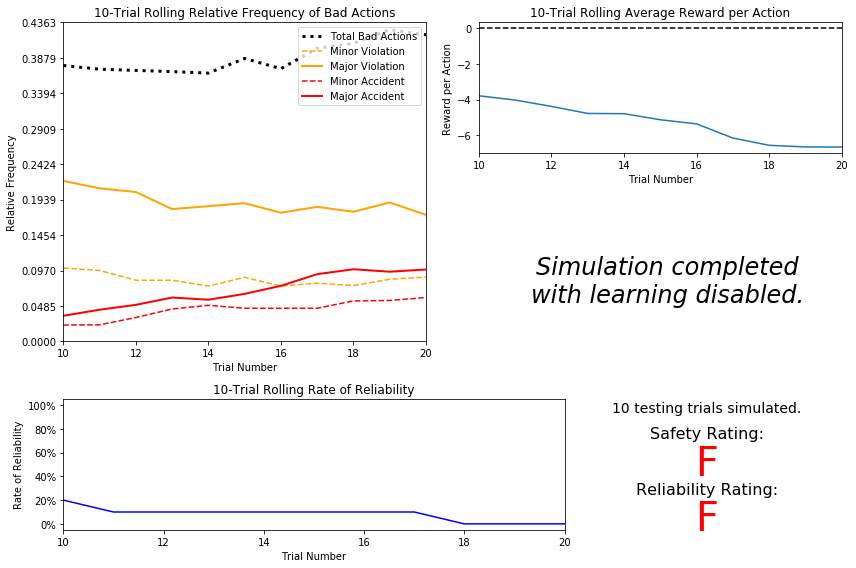

In [12]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### 问题 3
利用上面的从你初始模拟中得到的可视化结果，给出关于驾驶代理程序的分析和若干观察。确保对于可视化结果上的每个面板你至少给出一条观察结果。你可以考虑的一些情况：
- *驾驶代理程序多频繁地做出不良决策？有多少不良决策造成了事故？*
- *假定代理程序是随机驾驶，那么可靠率是否合理？*
- *代理程序对于它的行动会获得什么样的奖励？奖励是否表明了它收到严重的惩罚？*
- *随着试验数增加，结果输出是否有重大变化？*
- *这个智能出租车对于乘客来说，会被人为是安全的且/或可靠的吗？为什么或者为什么不？*

**答案：**
* 根据图1，经过20次训练，bad action比率不降反升，约在40%左右，而小型违规约在9%，大型违规约在20%，小型事故率约在5%，大型事故率约为10%；

* 根据图示，随机驾驶测试的可靠率从20%开始，随训练次数的增加而减少，最终可靠率趋于零；由于是随机驾驶，代理程序并没有进行学习，训练增加，出现事故/违规的情况也增加，可靠率则相应降低，是合理的；

* 程序获得了负的奖励，且训练次数越多，负值奖励越大；负值奖励证明程序受到了惩罚，且训练次数增加，惩罚也增加；

* 随着试验次数增加，随机驾驶程序的可靠性和奖励分数越来越低；

* 驾驶程序在随机驾驶情况下获得了双F的评分，显然既不安全也不可靠；根据之前的论述，随机驾驶程序训练的越多，可靠率越低，所以不可靠，而且随即驾驶程序bad action比率超过40%，总事故率超过15%，明显不安全；

-----
## 通知驾驶代理程序
创建一个优化Q-Learning的驾驶代理程序的第二步，是定义一系列代理程序会在环境中发生的状态。根据输入、感知数据和驾驶代理程序可用的变量，可以为代理程序定义一系列状态，使它最终可以*学习*在一个状态下它需要执行哪个动作。对于每个状态的`'如果这个处于这个状态就那个行动'`的状况称为**策略**，就是最终驾驶代理程序要学习的。没有定义状态，驾驶代理程序就不会明白哪个动作是最优的——或者甚至不会明白它要关注哪个环境变量和条件！

### 识别状态
查看`'build_state()'`代理程序函数，它显示驾驶代理函数可以从环境中获得下列数据：
- `'waypoint'`，*智能出租车*去向目的地应该行驶的方向，它是*智能出租车*车头方向的相对值。
- `'inputs'`，*智能出租车*的感知器数据。它包括  
  - `'light'`，交通灯颜色。
  - `'left'`，*智能出租车*左侧车辆的目的方向。如果没有车辆，则返回`None`。
  - `'right'`，*智能出租车*右侧车辆的目的方向。如果没有车辆，则返回`None`。
  - `'oncoming'`，*智能出租车*交叉方向车辆的目的方向。如果没有车辆，则返回`None`。
- `'deadline'`，*智能出租车*在时间之内到达目的地还所需的剩余动作数目。

### 问题 4
*代理程序的哪些可用特征与学习**安全性**和**效率**相关性最高？你为什么认为这些特征适合在环境中对**智能出租车**建模？如果你没有选择某些特征，放弃他们的原因是什么？*

**回答：**
* 观察程序代码后，我认为waypoint和inputs中的四个特征值都与安全性和效率相关，可以选择waypoint和inputs中的四个特征(light,left,right,oncoming)进行建模，不选择deadline；
* 选择waypoint原因在于，该特征值明显的表征了效率，到达目的地需要合适的waypoint；而且waypoint值是其他特征判断的基础，也会间接影响到安全性；
* inputs中的特征通过sense函数返回字典{'light': light, 'oncoming': oncoming, 'left': left, 'right': right}，通过inputs，才可以判断周围环境，进而在学习算法中优化动作，该特征值表征了安全性，间接影响效率；
* deadline值与效率有关，不选择的原因在于：1. deadline值为曼哈顿距离的5倍，每次开始训练该值的取值都是会改变的，且值可能很大，如果考虑，则可能会导致大量的计算，影响程序效率；2. deadline虽然表征效率，但是如果考虑将其纳入，一方面程序可能出现为了追求效率而违反规则（减低安全性）的行为，另一方面，也与实际情况不符和，没有说服力（实际情况下，司机不会以还剩余多少‘行动次数’来决定开车的行为）；

### 定义状态空间
当定义一系列代理程序会处于的状态，必需考虑状态空间的*大小*。就是说，如果你期望驾驶代理程序针对每个状态都学习一个**策略**，你会需要对于每一个代理状态都有一个最优的动作。如果所有可能状态的数量非常大，最后会变成这样的状况，驾驶代理程序对于某些状态学不到如何行动，会导致未学习过的决策。例如，考虑用下面的特征定义*智能出租车*的状态的情况：

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.
发生如`(False, True, True, True, False, False, '3AM')`的状态的频次如何？没有近乎无限数量的训练，很怀疑代理程序会学到一个合适的动作！

### 问题 5
*如果用你在**问题4**中选择的特征来定义一个状态，状态空间的大小是多少？假定你了解环境以及它是如何模拟的，你觉得经过合理数量的训练之后，代理驾驶能学到一个较好的策略吗？（遇见绝大部分状态都能作出正确决策。）*
**提示：** 考虑特征*组合*来计算状态的总数！

**回答：**
问题4中选择的特征中，waypoint包含'left'，'right'，'forward' 3个取值，light包含red，green两个取值，left，right，oncoming均分别包含'left'，'right'，'forward' 和None 4个取值，则状态空间为：
$3*2*4*4*4 = 384$

这个状态空间集合可以描述大多数驾驶场景，因此，经过合理数量的训练，应该可以获得一个较合适的策略；

### 更新驾驶代理程序的状态
要完成你的第二个实现，去到`'build_state()'`代理程序函数。根据你在**问题4**给出的判断，你现在要将`'state'`变量设定为包含所有Q-Learning所需特征的元组。确认你的驾驶代理程序通过运行代理程序文件和模拟会更新它的状态，注意状态是否显示了。如果用了可视化模拟，确认更新的状态和在模拟程序里看到的一致。

**注意：** 观察时记住重置模拟程序的标志到默认设定！

-----
## 实现Q-Learning驾驶代理程序
创建一个优化Q-Learning的驾驶代理程序的第三步，是开始实现Q-Learning自身的功能。Q-Learning的概念相当直接：每个访问的状态，为所有可用的状态-行动配对在Q-table里创建一条记录。然后，当代理程序遇到一个状态并执行了一个动作，基于获得的奖励和设定的相互的更新规则，来更新关联的状态-动作配对的Q-value。当然，Q-Learning还带来其他的收益，如此我们可以让代理程序根据每个可能的状态-动作配对的Q-values，来为每个状态选择*最佳*动作。在这个项目里，你会实现一个*衰减* $\epsilon$ *-贪心* 的Q-learning算法，不含折扣因子。遵从每个代理程序函数的**TODO**下的实现指导。

注意代理程序的属性`self.Q`是一个字典：这就是Q-table的构成。每个状态是`self.Q`字典的键，每个值是另一个字典，包含了*action*和*Q-value*。这里是个样例：

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

此外，注意你要求利用一个*衰减*$\epsilon$*（探索）因子*。因此，随着试验的增加，$\epsilon$会向0减小。这是因为，代理程序会从它的行为中学习，然后根据习得的行为行动。而且当$\epsilon$达到特定阈值后（默认阈值为0.01），代理程序被以它所学到的东西来作检测。作为初始的Q-Learning实现，你将实现一个线性衰减$\epsilon$的函数。

### Q-Learning模拟结果
要从最初的Q-learning程序获得结果，你需要调整下面的标志和设置：
- `'enforce_deadline'` - 将此标志设定为`True`来强制驾驶代理程序捕获它是否在合理时间内到达目的地。
- `'update_delay'` - 将此标志设定为较小数值（比如`0.01`）来减少每次试验中每步之间的时间。
- `'log_metrics'` - 将此标志设定为`True`将模拟结果记录为在`/logs/`目录下的`.csv`文件，Q-table存为`.txt`文件。
- `'n_test'` - 将此标志设定为`'10'`则执行10次测试试验。
- `'learning'` - 将此标志设定为`'True'`来告诉驾驶代理使用你的Q-Learning实现。

此外，使用下面的$\epsilon$衰减函数：

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

如果你在实施时遇到困难，尝试把`'verbose'`标志设为`True`来调试。调试时，在这里设定的标志会返回到它们的默认设定。重要的是你要理解每个标志做什么并且解释它们怎么影响模拟！

当你成功完成初始的Q-Learning模拟程序后，运行下面代码单元格来使结果可视化。注意当相同的模拟运行时，log文件会被覆写，所以要留意载入的log文件！

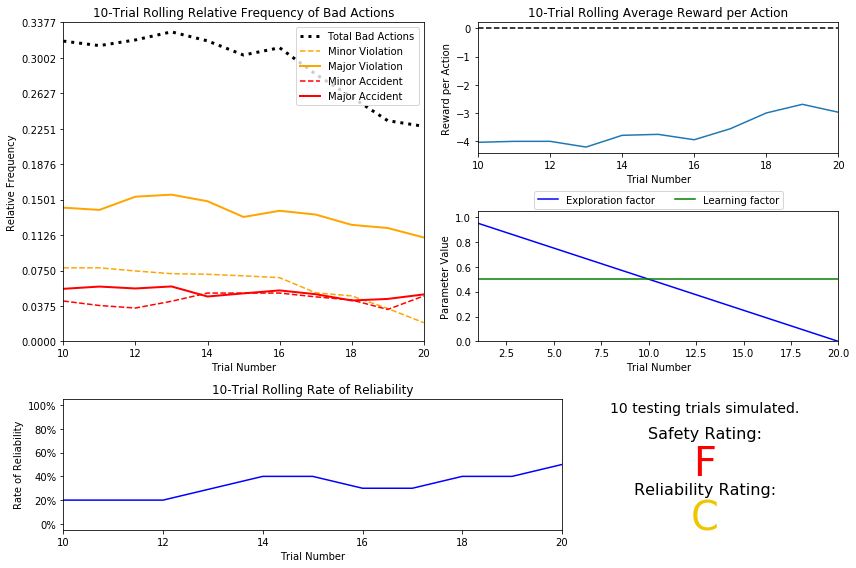

In [17]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### 问题 6
利用上面的从你默认的Q-Learning模拟中得到的可视化结果，像在**问题3**那样，给出关于驾驶代理程序的分析和若干观察。注意模拟程序应该也产生了Q-table存在一个文本文件中，可以帮到你观察代理程序的算法。你可以考虑的一些情况：
- *有没有观察到基本驾驶代理程序和默认的Q-Learning代理程序的相似之处？*
- *在测试之前驾驶代理大约需要做多少训练试验？在给定的$\epsilon$ 容忍度下，这个数字是否合理？*
- *你实现的$\epsilon$（探索因子）衰减函数是否准确地在参数面板中显示？*
- *随着试验数增加，不良动作的数目是否减少?平均奖励是否增加？*
- *与初始的驾驶代理程序相比，安全性和可靠性评分怎样？*

**回答：**
* 与默认的随机学习相比，均进行了20次训练，训练的基本过程是一致的，即根据状态，执行动作，获得评分reward；不同点在于，随机程序每次都是在执行动作中随机选取，而Q-Learning模拟引入了ϵϵ 衰减函数，进行了学习；
* 在测试前完成了20次训练，在给定的ϵϵ 下，该值是合理的，因为初始ϵϵ值为1，第一次迭代值为0.95，经过20次迭代后，ϵϵ值为0< 0.05，完成训练；
* ϵϵ衰减函数成功显示于上图；
* 随着试验次数增加，不良动作数目下降，而平均奖励有所上升，且两者的趋势都很明显；
* 与初始的随机程序相比，安全性评分仍为F，可靠性则有所提升，达到C；考虑到不良动作与平均奖励的变化趋势，可以预见随着训练次数的上升，程序的安全性及可靠性评价应该也会有所提升；

-----
## 改进Q-Learning驾驶代理程序
创建一个优化Q-Learning的驾驶代理程序的第三步，是执行优化！现在Q-Learning算法已经实现并且驾驶代理程序已经成功学习了，需要调整设定、调节参数让驾驶代理程序学习**安全性**和**效率**。通常这一步需要很多试验和错误，因为某些设定必定会造成更糟糕的学习。要记住的一件事是学习的行为本身和需要的时间：理论上，我们可以允许代理程序用非常非常长的时间来学习；然而，Q-Learning另一个目的是*将没有习得行为的试验试验变为有习得行为的行动*。例如，训练中总让代理程序执行随机动作（如果$\epsilon = 1$并且永不衰减）当然可以使它*学习*，但是不会让它*行动*。当改进你的Q-Learning实现时，要考虑做一个特定的调整的意义，以及它是否逻辑上是否合理。

### 改进Q-Learning的模拟结果
要从最初的Q-learning程序获得结果，你需要调整下面的标志和设置：
- `'enforce_deadline'` - 将此标志设定为`True`来强制驾驶代理程序捕获它是否在合理时间内到达目的地。
- `'update_delay'` - 将此标志设定为较小数值（比如`0.01`）来减少每次试验中每步之间的时间。
- `'log_metrics'` - 将此标志设定为`True`将模拟结果记录为在`/logs/`目录下的`.csv`文件，Q-table存为`.txt`文件。
- `'learning'` - 将此标志设定为`'True'`来告诉驾驶代理使用你的Q-Learning实现。
- `'optimized'` - 将此标志设定为`'True'`来告诉驾驶代理你在执行一个优化版本的Q-Learning实现。

优化Q-Learning代理程序可以调整的额外的标志：
- `'n_test'` - 将此标志设定为某个正数（之前是10）来执行那么多次测试试验。
- `'alpha'` - 将此标志设定为0 - 1之间的实数来调整Q-Learning算法的学习率。
- `'epsilon'` - 将此标志设定为0 - 1之间的实数来调整Q-Learning算法的起始探索因子。
- `'tolerance'` - 将此标志设定为某个较小的大于0的值（默认是0.05）来设定测试的epsilon阈值。

此外，使用一个你选择的$\epsilon$ (探索因子)衰减函数。注意无论你用哪个函数，**一定要以合理的速率衰减**到`'tolerance'`。Q-Learning代理程序到此才可以开始测试。某个衰减函数的例子($t$是试验的数目)：

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$

如果你想的话，你也可以使用$\alpha$ （学习率） 的衰减函数，当然这通常比较少见。如果你这么做了，确保它满足不等式$0 \leq \alpha \leq 1$。
如果你在实施时遇到困难，尝试把`'verbose'`标志设为`True`来调试。调试时，在这里设定的标志会返回到它们的默认设定。重要的是你要理解每个标志做什么并且解释它们怎么影响模拟！

当你成功完成初始的Q-Learning模拟程序后，运行下面代码单元格来使结果可视化，请注意为了达到项目要求你需要在安全性和可靠性上获得至少都为A的评分。注意当相同的模拟运行时，log文件会被覆写，所以要留意载入的log文件！

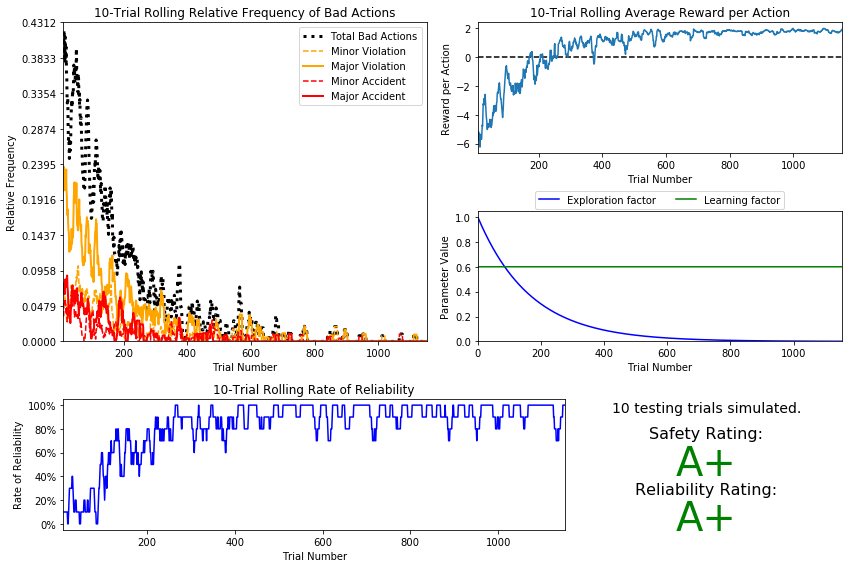



-------------------------------------------------------------------------------------------------




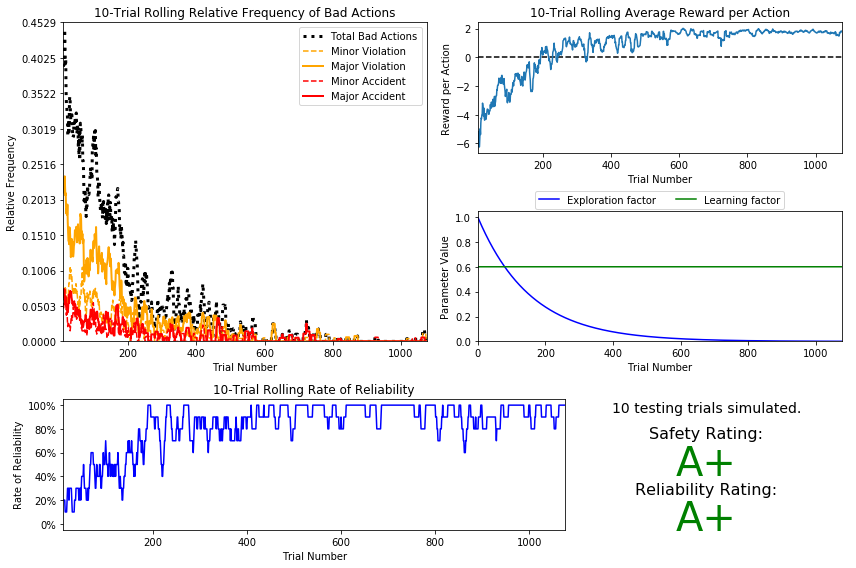

In [46]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning_e1.csv')# epsilon = e^{-at} ，tolerance=0.001
print '\n'
print '-------------------------------------------------------------------------------------------------'
print '\n'
vs.plot_trials('sim_improved-learning_a1.csv')# epsilon = a^t ，tolerance=0.001

### 问题7
利用上面的从你改进的Q-Learning模拟中得到的可视化结果，像在**问题6**那样，给出关于改进的驾驶代理程序的最终分析和观察。你需要回答的问题：
- *使用了什么epsilon（探索因子）的衰减函数？*
- *在测试之前驾驶代理大约需要做多少训练试验？*
- *你用了什么epsilon-tolerance和alpha（学习率）值？为什么？*
- *与之前的默认Q-Learning学习器相比，这个Q-Learning学习器有多少改进？ *
- *你会说Q-Learning学习器的结果表明了你的驾驶代理程序成功地学习了一个合适的策略吗？*
- *你对*智能出租车*的安全性和可靠性评分满意吗？*

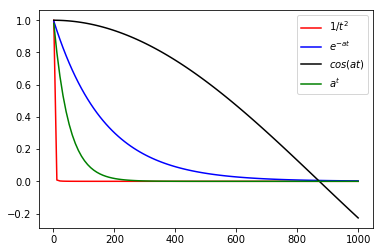

In [47]:
import numpy as np  
import matplotlib.pyplot as plt
import math

t=np.linspace(1,1000,100)  
y= 1.0 / (t ** 2)
z= np.exp(-0.006*t)
a= np.cos(0.0018*t)
b= np.power(0.98,t)
plt.plot(t,y,label='$1/t^2$',color='red')
plt.plot(t,z,label='$e^{-at}$',color='blue')
plt.plot(t,a,label='$cos(at)$',color='black')
plt.plot(t,b,label='$a^t$',color='green')
plt.legend(loc='upper right')
plt.show()

思路：
1. 训练次数： 一共有384个特征空间，每个特征空间可选action有4个（left,right,foward,none），假设依次完全遍历，则需要$384*4 = 1536 $ 次，则训练次数最少也要达到1536次，才有可能完全遍历，完成训练；假设这些状态是随机分布的，符合正态分布，为了获得好的结果，则训练次数也至少需要大于$\sigma$,即1536*0.667= 1024次

2. 衰减函数：从choose_action可知， action 会以 $\epsilon$ 概率选择 randomAction 并以 $(1-\epsilon)$ 概率选择bestScoreAction ,那么，$\epsilon$ 就不能衰减的太快，因为要留足够的训练次数给程序随机探索的机会，而当探索达到一定程度时候，$\epsilon$需要收敛到一个很小的接近于0的值，使得action选择已训练的bestScoreAction；

3. $\epsilon$取值问题：根据2中的讨论，将 $\epsilon$初始值定为1，可以使action在开始的训练中以比较大的 $\epsilon$ 概率进行随机动作探索，所以，考虑将 $\epsilon$ 初值设为1；

3. 如上图所示，观察给定的4个函数的衰减速率：其中，$1/t^2$ 衰减速率似乎过大，且 $1/t^2$无法调节，$cos(at)$ 选择[0,$pi/2$]值域可以使用，$a^t$ 可以将a值调节到接近1来减缓衰减速率，而$e^{-at}$ 衰减速率逐渐变小，最终收敛，且通过a值方便控制，可以选择这两者作为衰减函数；

4. $\alpha$ 的确定问题,由于不考虑 $ \gamma$ 则learn函数中，有：$ Q = (1-\alpha)*Q + R* \alpha $，其中R 为reward， 变换有 $ \alpha =\frac {\hat{Q} -Q}{R-Q} $ ,显然，$\alpha$ 过大，则reward比重过大，对已有的Q的学习不够，$\alpha$ 太小，reward效果太小，学习能力太低，因此需要权衡，根据多次试验，确定了$\alpha$ = 0.6；


**回答：**
* 根据如上思路，完成了Q-learning改进；

* 采用了 $\epsilon$ =1，$\alpha = 0.6 $,衰减函数分别选取了$e^{-0.01*\alpha*t}$ 和 $ \epsilon = a^t $进行训练；效果均不错；

* epsilon-tolerance值设定为了0.001，解方程$e^{-0.01*\alpha*t} = 0.001$，得 $ t =1152$,所以在测试前共进行了1152次试验，符合上面思路得假设；
*  $ \epsilon = a^t $ 作为衰减函数时，训练了1076次

* 训练次数得增加明显提高了代理程序得能力，由结果图可知，在训练约800次后，bad action 和违规，事故率均收敛，收敛结果在0左右，与之前默认的学习器相比有了极大的改进；

* 从结果上看，学习器确实进行了学习，并且成功学习到了在该情况下的合适策略；

* 安全性和可靠性结果均为A+, 结果满意；

### 定义一个最优策略

有时，对于重要的问题*“我要让我的代理程序学习什么？”*的答案，只是理论性的，无法具体描述。然而这里，你可以具体定义代理程序要学什么，就是美国通行权交通法案。这些法律是已知信息，你可以基于这些法律，为*智能出租车*进一步定义每一个状态所做的最优动作。在那种情况下，我们称这一系列最优状态-动作配对为**最优策略**。因此，不像那些理论性的回答，不仅通过收到的奖励（惩罚），而且纯观察，代理程序是否在“错误”地行动能很清晰地得知。如果代理程序闯了红灯，我们既看见它获得了一个负面奖励，也知道这是一个错误的行为。这可以用来帮你验证驾驶代理程序习得的**策略**是否正确，或只是个**次优策略**。

### 问题 8
给出几个关于最优策略是什么样子的例子（用你已定义的状态）。之后，查看`'sim_improved-learning.txt'`文本文件，看你的改进的Q-Learning算法的结果。_每个从模拟中纪录的状态，对于给定的状态，**策略**（得分最高的动作）是否正确？是否对于有些状态，有策略不同于预期的最优策略？_给出一个状态和记录的状态-动作的奖励，解释为什么正是个正确的策略。

** review：**

最佳策略的讨论还需完善。
首先应该比较具体地讨论，宏观上，什么是智能车的最佳策略。这基本上就是我们为什么要做这个项目训练智能车的原因。
然后，结合智能车的性能，观察和分析智能车学习最佳策略中遇到的问题和障碍。

宏观上的最佳策略是智能车如何达到目的地，这跟我们每天出行是一样的。在每个路口，由于车辆和红绿灯的不同，我们会采取不同的行动，但我们采取不同行动的目的是唯一的。我们训练智能车，应该不仅仅希望它在不同的路口选择正确的行动，遵守交规，不违章，更需要它能够“把握”自己的大方向，随机应变，“智能”地接近目的地。

**回答：** 

    首先宏观考虑什么是“最优策略”：显然，出租车的最终目的是到达终点，且直观上，该行为完成的越快越好，这就要求程序注重效率性，即策略的每次行动都要保证与最终目的（到达终点）一致，那么，最优效率的决策就应该是每次行动都符合特征空间state中该次waypoint的取值；

    但是，出租车除了到达终点这个根本目的外，在行驶过程中，还需要考虑到安全性，且安全性要求贯穿始终，每一次的决策行动都需要考虑安全性，安全性的具体提现就在于：遵守交通规则；

    综合以上两点，一个合理的策略就是：在遵守交通规则，不发生事故、违章的前提下，尽可能的选择符合能够到达终点的行动，以尽快到达终点；


    进而查阅了以下美国交通规则：[美国驾驶手册(中文版)](https://wenku.baidu.com/view/a14f2ba1b8f67c1cfad6b8e8.html?pn=51)；


    主要的几点包括：

    1. 行人路权优先；
    2. 靠右行驶
    3. 红灯停止，绿灯行驶
    4. 红灯状态下，可以右转，但右转路权低于交叉方向直行的旁车（红灯右转）
    5. 绿灯状态下，左转时，需要避让旁车的直行车辆（左转让直行）；



    在本程序中，定义的状态值为：

    state=(waypoint, inputs['light'], inputs['left'], inputs['right'], inputs['oncoming'])

    进行查找文件为：sim_improved-learning_e1.txt


    按照上面讨论的交通规则，可以有这些情况：


*   红灯的情况：('forward', 'red', 'forward', None, 'left')，

    此时红灯，waypoint== forward，根据上面总结的策略，最优策略应为None，尽管这样与waypoint取值forward不一致，不是最快到达策略，但这样遵守交规，是事实上的最优策略；

    查找文件，获得一个此情况的表现：
    
    ('forward', 'red', 'forward', None, 'left')
    
 -- forward : -39.90
 
 -- right : -16.41
 
 -- None : 1.70
 
 -- left : 0.00
 
 程序选择了None，为最优策略
 
*   红灯的情况： ('right', 'red', None, 'forward', 'right')
    此时红灯，waypoint== right，根据上面总结的策略，最优策略应为right，因为根据交规，不发生事故（右转让直行）的情况下，红灯可以右转，此时选择右转，符合提高效率的原则，所以应该选择right

    查找文件，获得一个此情况的表现：
    
    ('right', 'red', None, 'forward', 'right')

 -- forward : 0.00
 
 -- right : 1.84
 
 -- None : 1.07
 
 -- left : 0.00
 
 
    程序选择了right，为最优策略
  

*   同样的，再看绿灯的情况，首先绿灯直行的例子：

    ('forward', 'green', 'forward', 'forward', 'forward')此时绿灯，waypoint为forward。最优策略应该选择forward；
    
    查找文件，获得：
    
    ('forward', 'green', 'forward', 'forward', 'forward')
    
 -- forward : 1.92
 
 -- right : 0.00
 
 -- None : 0.00
 
 -- left : -18.90
 
  程序选择了forward，为最优策略
  

*   再看一个绿灯直行状态下，其他车与自己行驶路线干扰的例子：('forward', 'green', 'left', 'left', 'left')

    waypoint为forward。最优策略应该选择forward，但left，right，forward车均左转，如果选择forward，则可能相撞；
    
    查找文件，获得：
    
    ('forward', 'green', 'left', 'left', 'left')

 -- forward : 0.00
 
 -- right : 0.00
 
 -- None : 1.39
 
 -- left : 0.00
 
    此时车辆选择了不动，虽然影响了一定的效率，但可以避免相撞，确保了安全性，是此情况下应当选择的策略；
    
 
*   再看一个绿灯状态下转弯的例子：('left', 'green', 'forward', None, 'forward')，

    waypoint为left。最优策略应该选择left，但left车为forward，如果选择left，则必然相撞，所以要选择符合交规的行动（左转让直行）；
 
     查找文件，获得：
     
     ('left', 'green', 'forward', None, 'forward')
 
 -- forward : 0.66
 
 -- right : 0.15
 
 -- None : 0.00
 
 -- left : -12.54
 
    可以看出，此时程序选择forward，避免相撞，是遵从安全性的选择，且此时本来的最优策略left为一个很大的负值，也验证了如果选择left，则会相撞的实际情况；
    
 
 * 所以，程序在允许的情况下，会选择符合waypoint的策略，在有其他车干扰情况下，会选择安全性的策略，尽管该策略可能会影响效率（与waypoint不符合）；即满足我们提出的策略：在遵守交通规则，不发生事故、违章的前提下，尽可能的选择符合能够到达终点的行动，以尽快到达终点；

-----
### 选做：未来奖励 - 折扣因子 `'gamma'`
也许你会好奇，作为Q-Learning算法的一部分，之前要求你在实现中**不要**使用折扣引子`'gamma'`。在算法中包含未来奖励能有助于在未来状态回溯到当前状态时的反向正面奖励。本质上，如果给予驾驶代理程序执行若干动作到达不同状态的选择，包含未来奖励会是代理程序偏向可以得到更多奖励的状态。一个例子是驶向目的的驾驶代理程序：所有行动和奖励都相等，那么理论上如果到达目的地会有额外奖励，驶向目的会获得更好的奖励。然而，即使在这个项目里，驾驶代理程序也要在规定的时间里到达目的地，包含未来奖励不会有益于代理程序。实际上，如果代理程序给予多次试验学习，它甚至会给Q-value带来负面影响！

### 可选问题 9
*在项目中有两个特点使得未来奖励在这个Q-Learning算法无效。一个特点是关于*智能出租车*本身，另一个是关于环境。你能指出它们是什么以及为什么未来奖励不会在这个项目中起效？*

**回答：**
* 首先，关于出租车本身，如果在算法里包含未来奖励，程序为了获得奖励会采取最短最快的方式到达目的地，这样会导致代理程序的最快到达目的地与遵守交通规则两个目标产生冲突，在此情况下，出租车程序会违反交通规则而获得奖励，这使得训练变得没有意义，出租车程序也无法真正学习；
* 关于环境的原因可能是：在程序设置中，出租车初始位置是随机的，即环境网格中每一点都是等权重的，这与‘驶向目的地会获得未来奖励’相冲突；实际上，在程序中，每一步的行为仅将影响传到下一步的状态，并不受最终目的地的影响，未来奖励在这种情况下不应该有影响；

> **注意**:当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出**File -> Download as -> HTML (.html)**把这个 HTML 和这个 iPython notebook 一起做为你的作业提交。